# Exploratory Data Analysis (EDA)

In [2]:
#import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st
import seaborn as sns
#loading the data set
df=pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
#find did any null values exists
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [4]:
# finding different datatypes in data set
print(df.dtypes)

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [6]:
# finding column names
print(df.columns)

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')


In [7]:
#remove outlier, NaN
import numpy as np
non_zero=df.select_dtypes(include='number').columns
for column in non_zero:
    df[column]=df[column].replace(0,np.NaN)
    mean=int(df[column].mean(skipna=True))
    df[column]=df[column].replace(np.NaN,mean)
    print(df[column])

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Type, Length: 178, dtype: int64
0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: Alcohol, Length: 178, dtype: float64
0      1.71
1      1.78
2      2.36
3      1.95
4      2.59
       ... 
173    5.65
174    3.91
175    4.28
176    2.59
177    4.10
Name: Malic, Length: 178, dtype: float64
0      2.43
1      2.14
2      2.67
3      2.50
4      2.87
       ... 
173    2.45
174    2.48
175    2.26
176    2.37
177    2.74
Name: Ash, Length: 178, dtype: float64
0      15.6
1      11.2
2      18.6
3      16.8
4      21.0
       ... 
173    20.5
174    23.0
175    20.0
176    20.0
177    24.5
Name: Alcalinity, Length: 178, dtype: float64
0      127
1      100
2      101
3      113
4      118
      ... 
173     95
174    102
175    120
176    120
177     96
Name: Magnesium, Length: 178, dtyp

In [8]:
# finding number of null values in each column
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [9]:
#check for columns with mixed types
for col in df.columns:
    if df[col].apply(type).nunique() > 1:
        print(f"Column {col} has mixed data types.")
    else:
        print(f"Column {col} don't have mixed data types.")

Column Type don't have mixed data types.
Column Alcohol don't have mixed data types.
Column Malic don't have mixed data types.
Column Ash don't have mixed data types.
Column Alcalinity don't have mixed data types.
Column Magnesium don't have mixed data types.
Column Phenols don't have mixed data types.
Column Flavanoids don't have mixed data types.
Column Nonflavanoids don't have mixed data types.
Column Proanthocyanins don't have mixed data types.
Column Color don't have mixed data types.
Column Hue don't have mixed data types.
Column Dilution don't have mixed data types.
Column Proline don't have mixed data types.


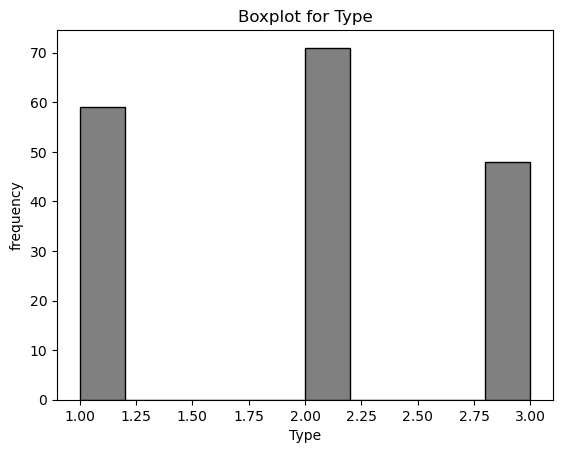

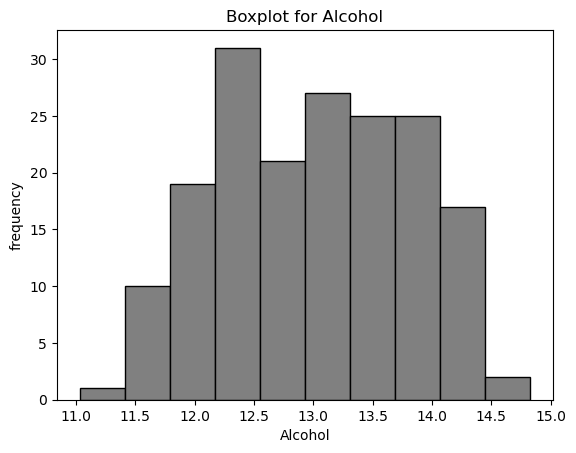

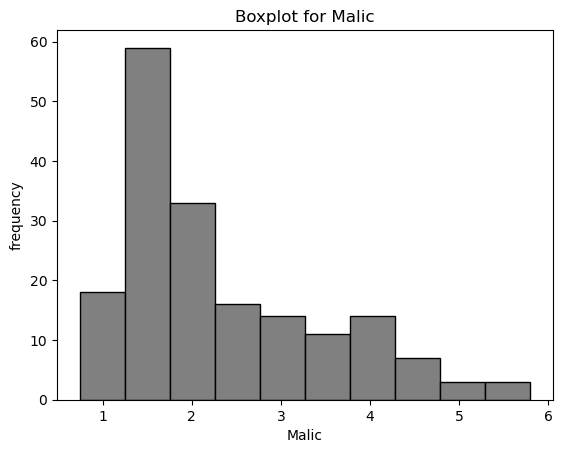

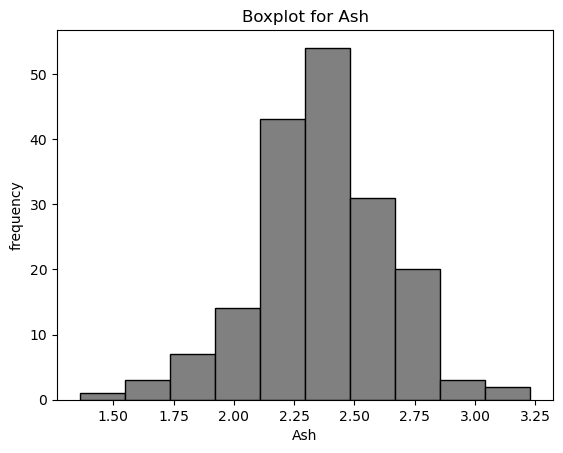

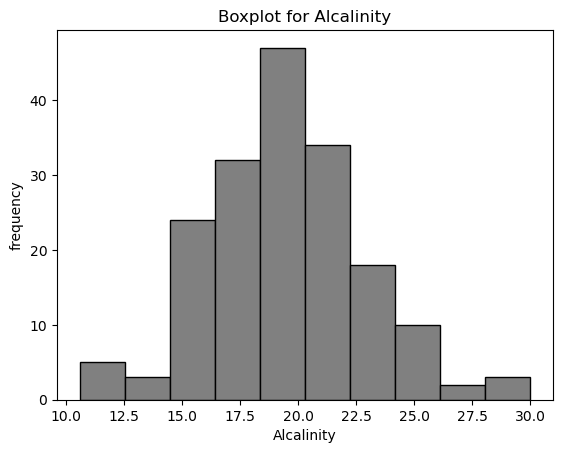

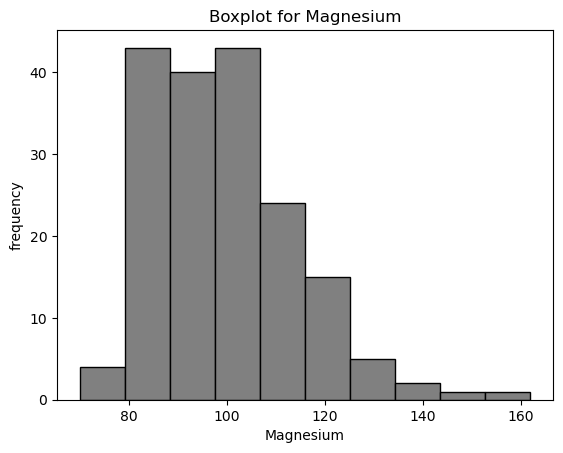

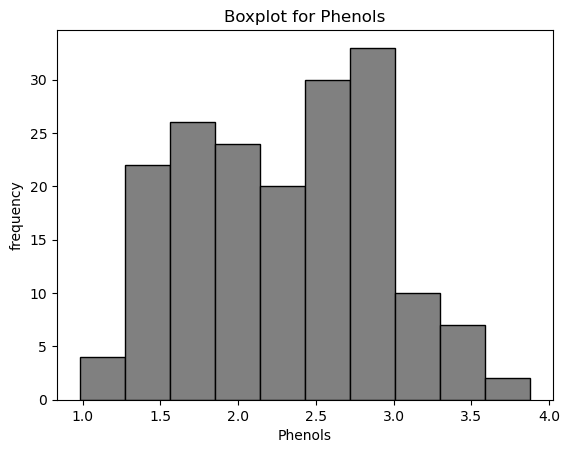

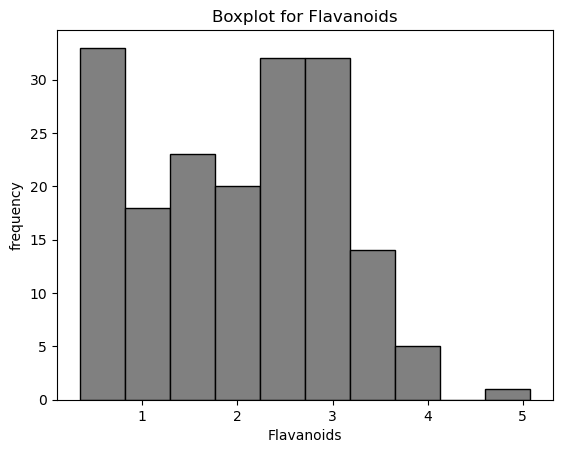

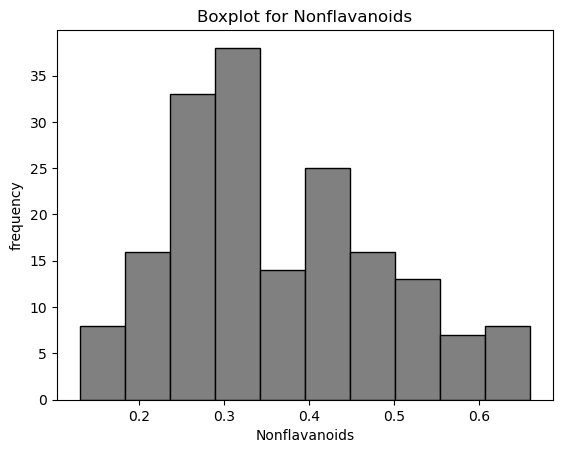

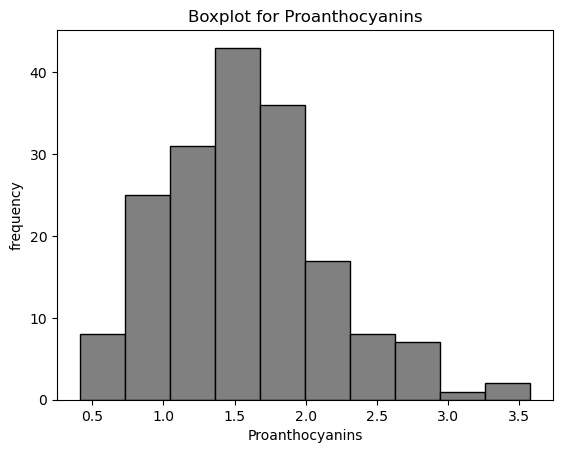

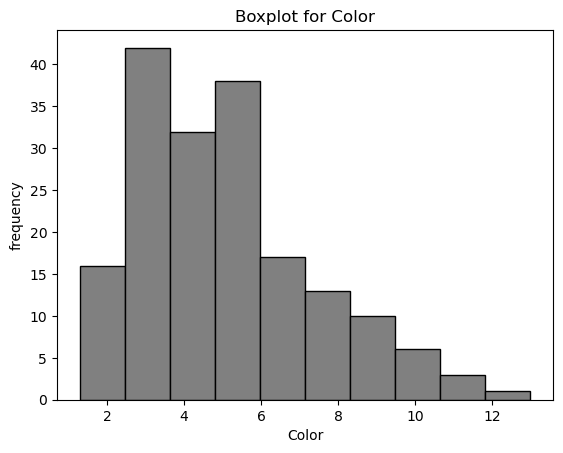

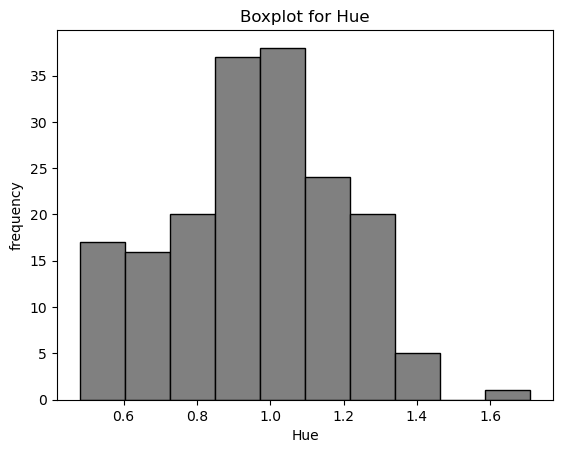

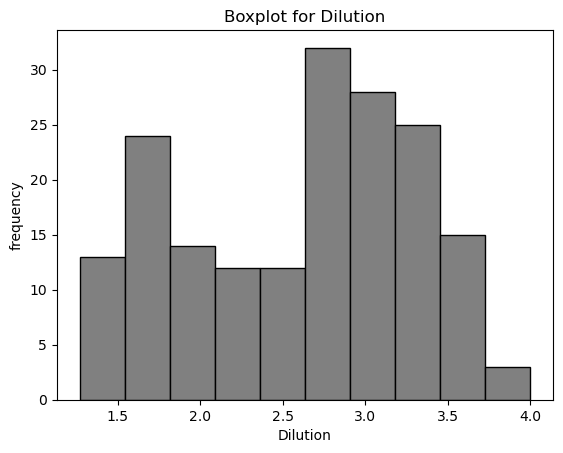

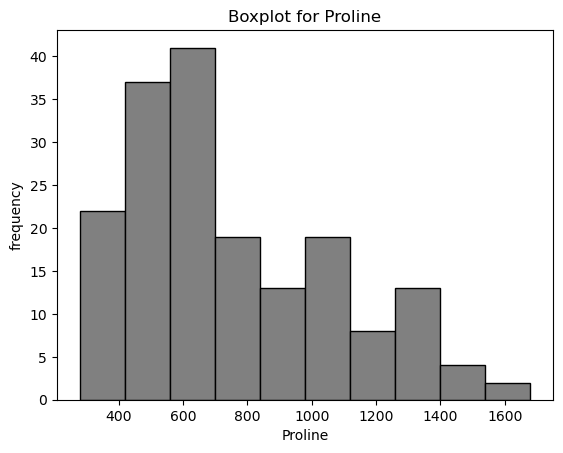

In [10]:
# creating histograms for numerical columns
# selecting only numerical columns
for column in df.select_dtypes(include='number').columns:
    #creating histogram
    plt.hist(df[column],edgecolor='black',color='grey')
    plt.title(f'Boxplot for {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('frequency')
    plt.show()

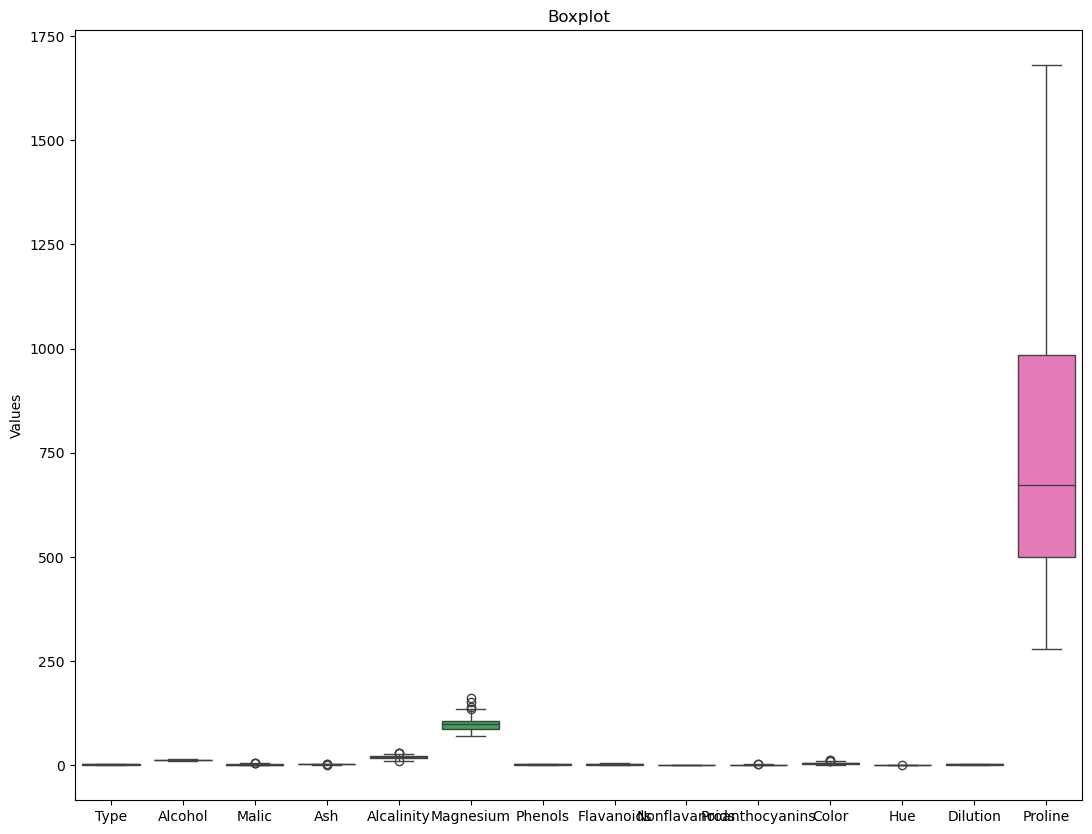

In [11]:
# creating boxplot
plt.figure(figsize=(13, 10))
sns.boxplot(df)
plt.title('Boxplot')
plt.ylabel('Values')
plt.show()

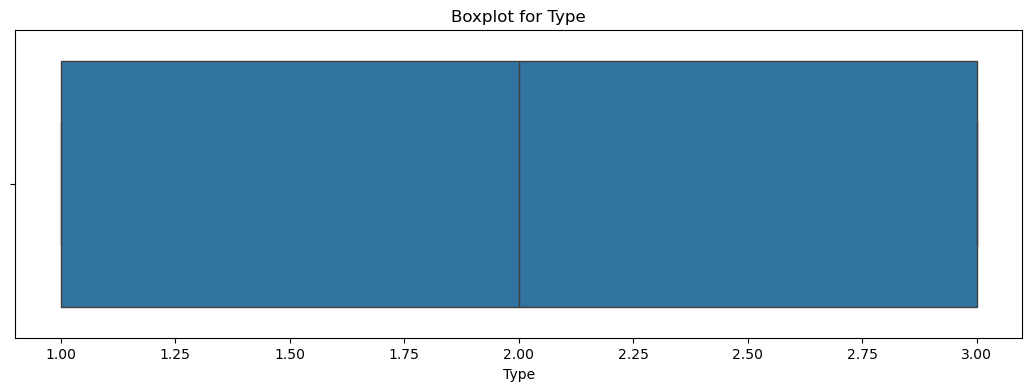

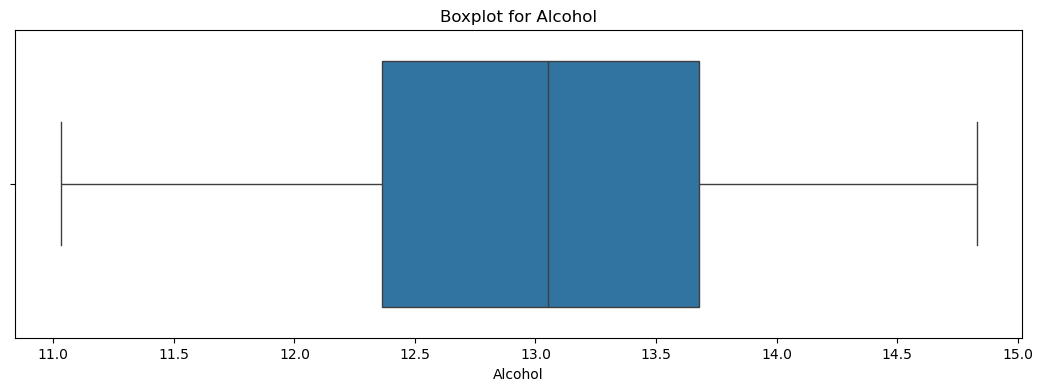

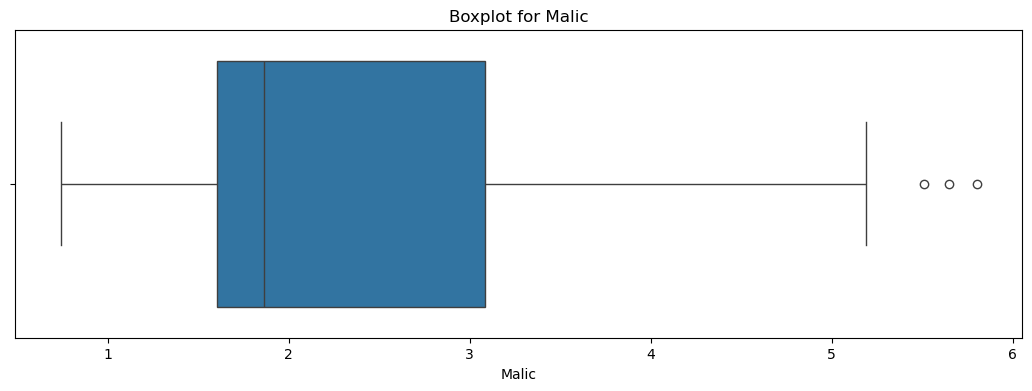

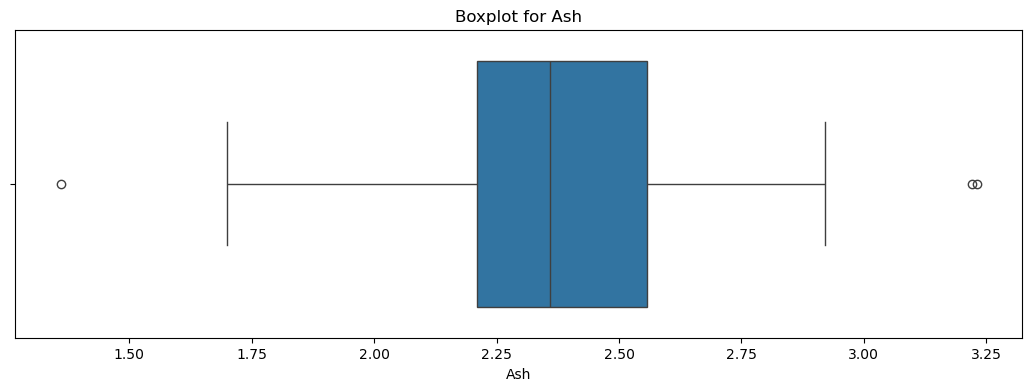

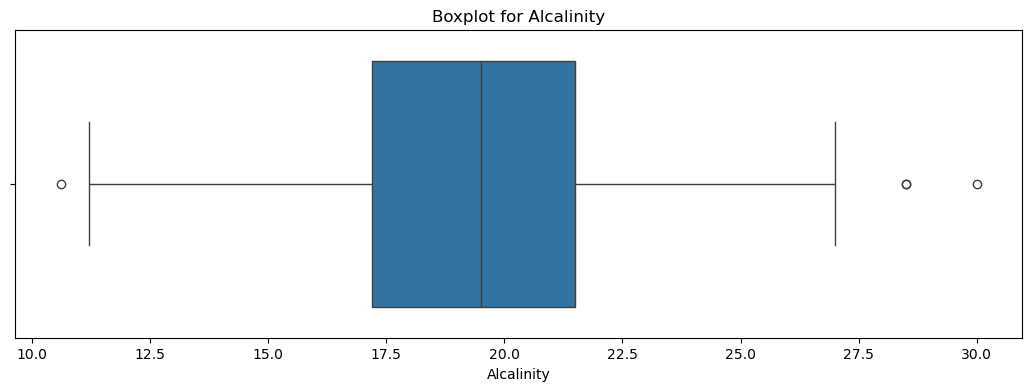

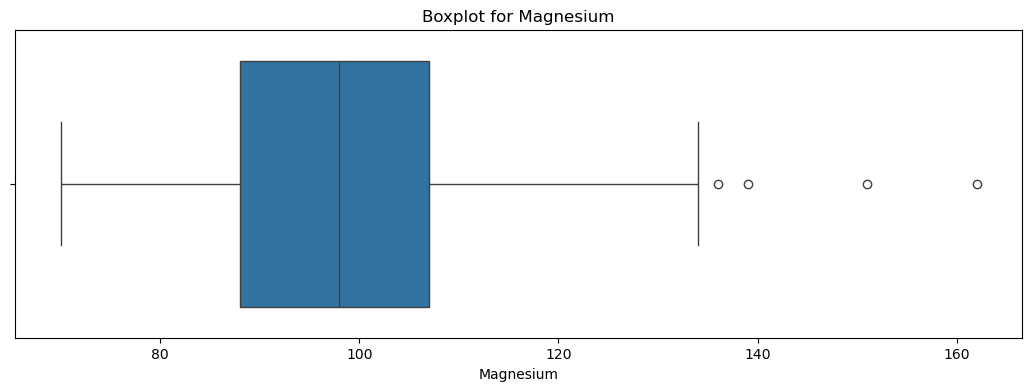

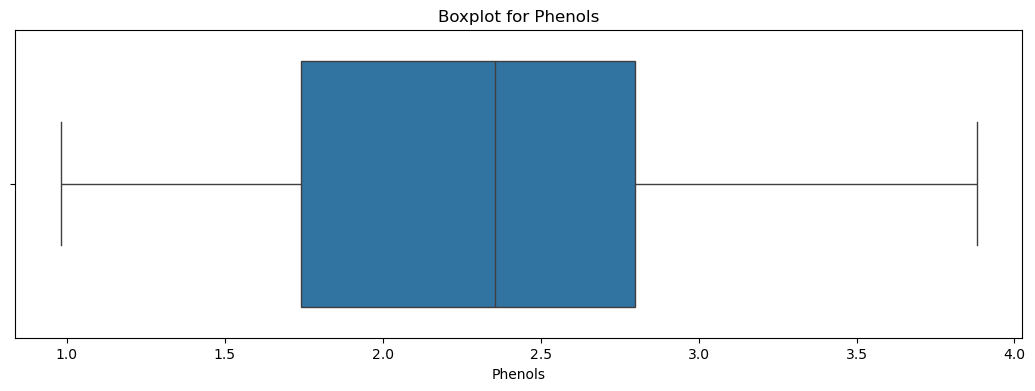

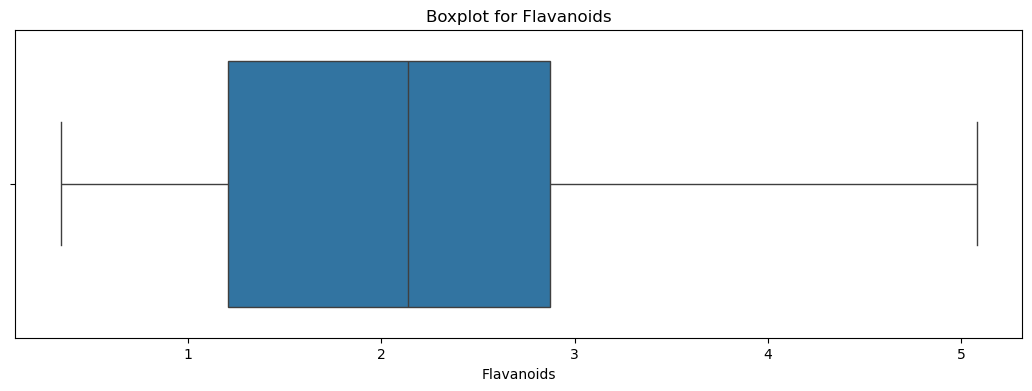

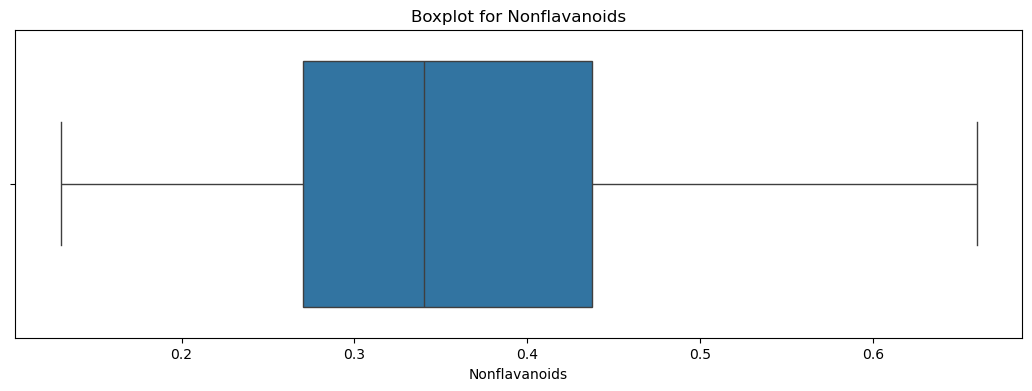

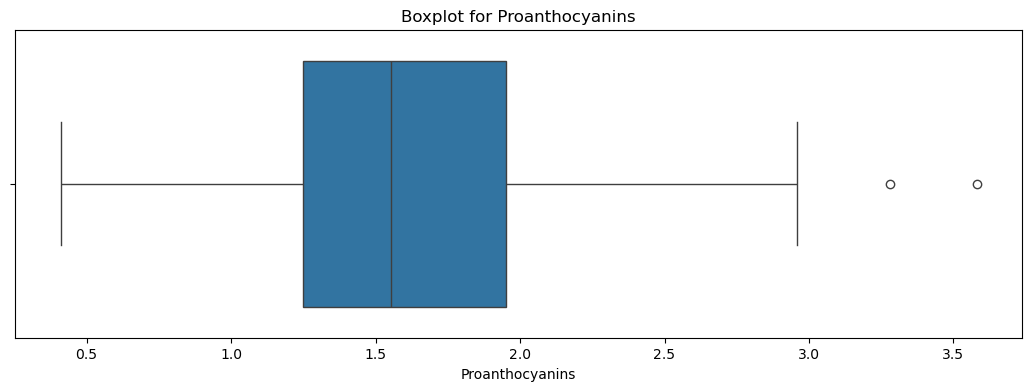

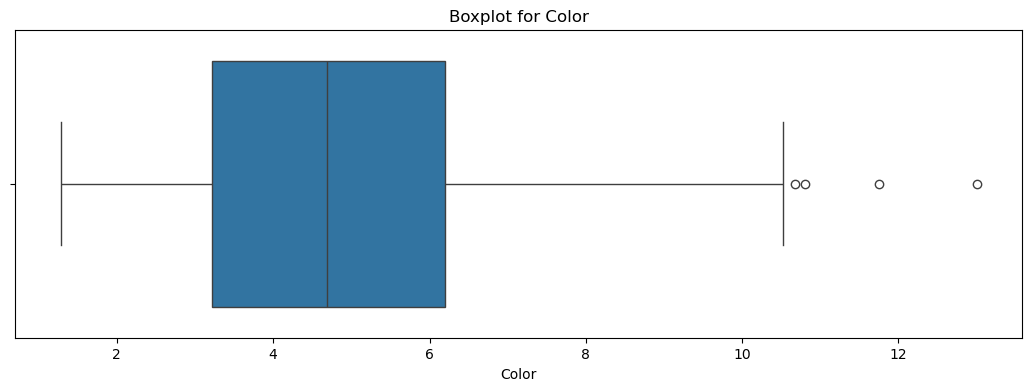

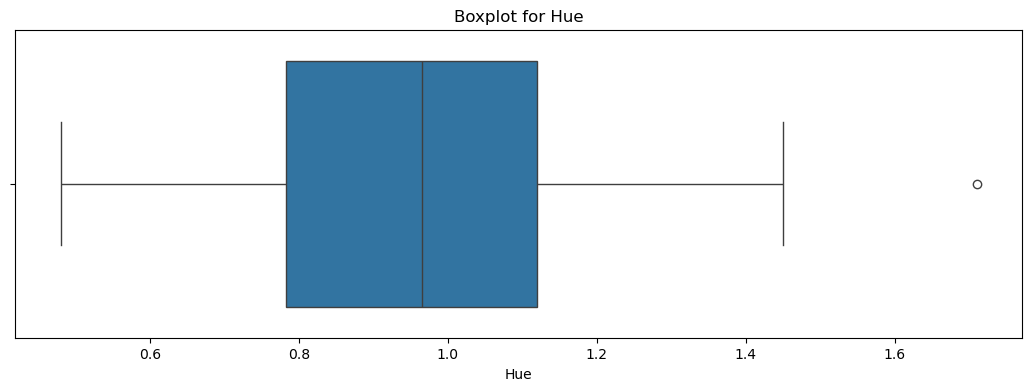

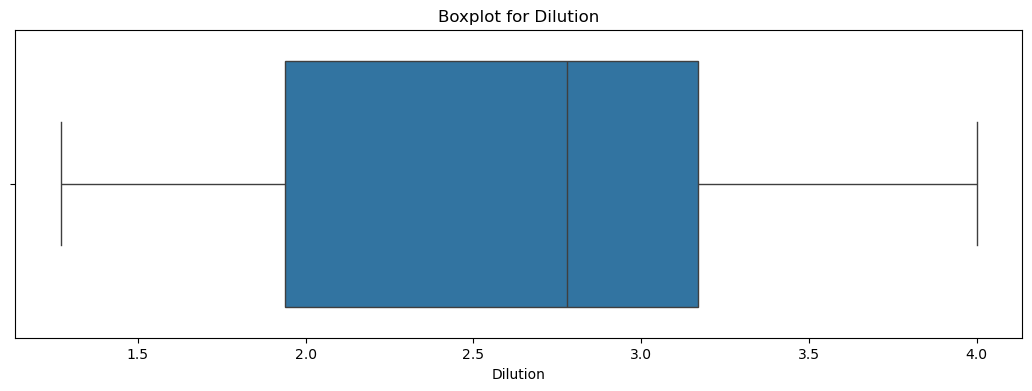

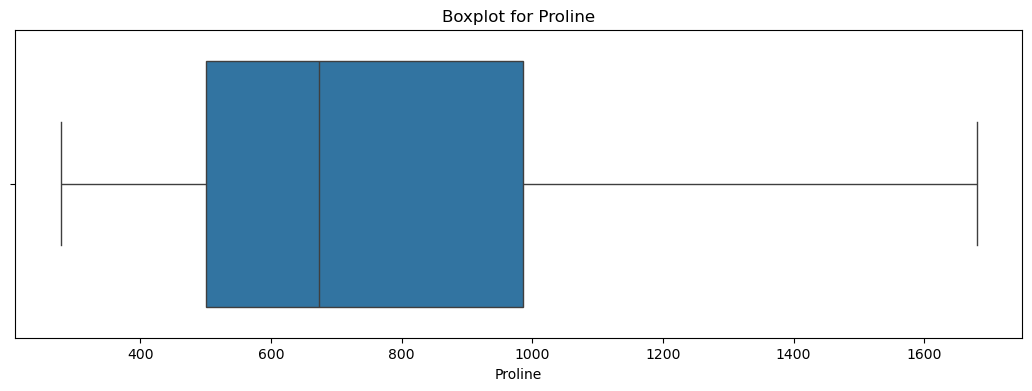

In [12]:
# Alternatively, using seaborn for better visualization creating boxplot for each column seperately
for column in df.columns:
    plt.figure(figsize=(13, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


<Axes: >

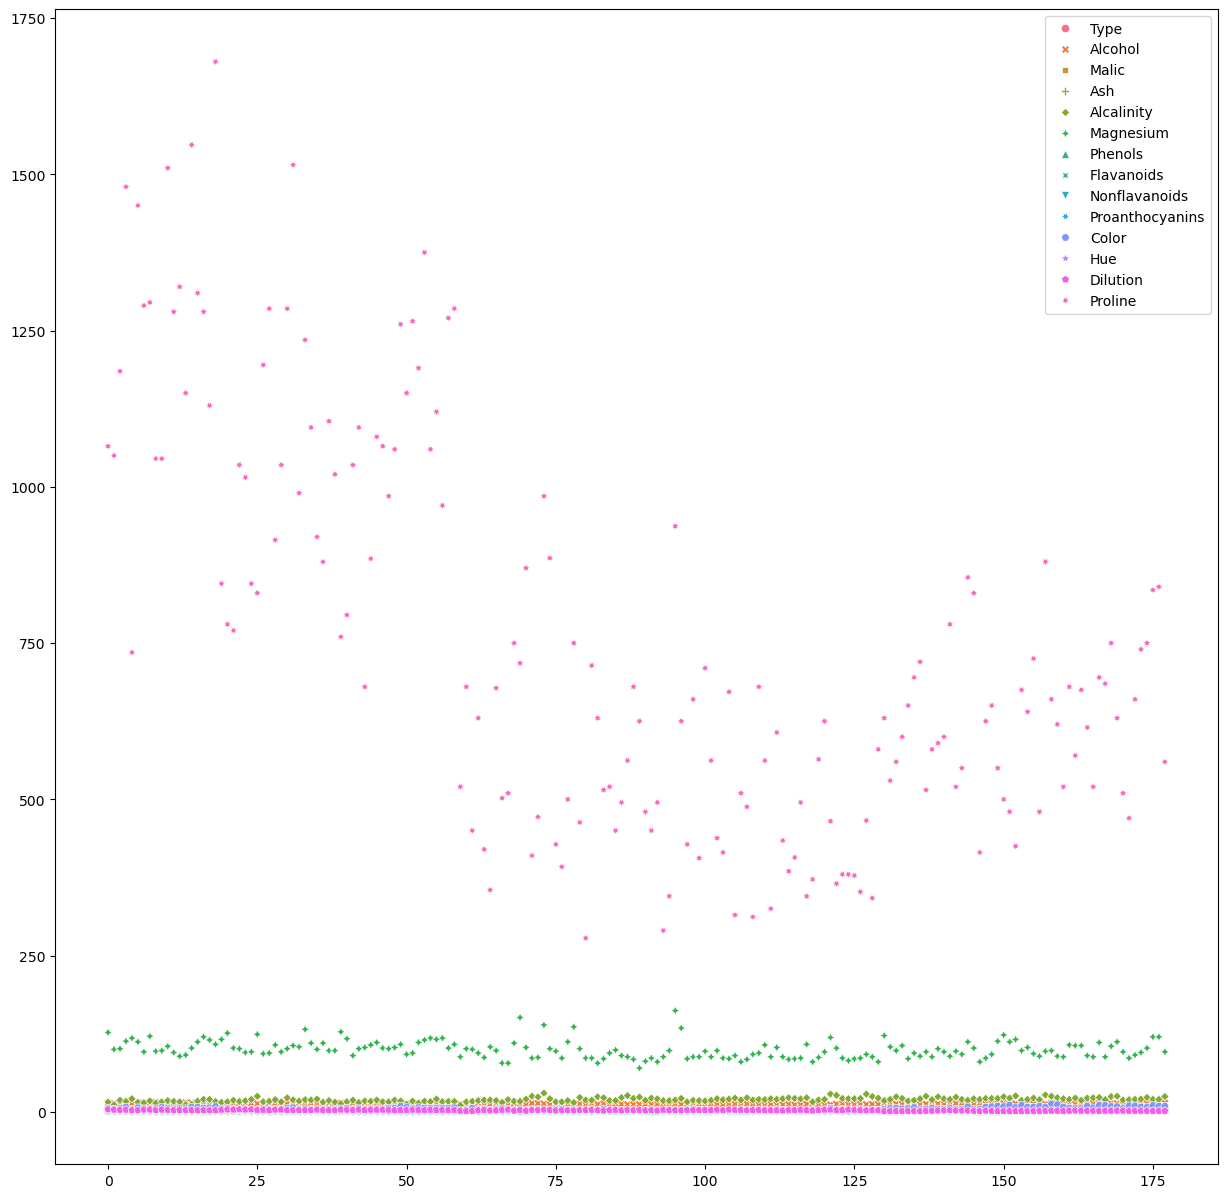

In [13]:
# Generating scatter plots to explore relationships between pairs of variables

plt.figure(figsize=(15,15))
sns.scatterplot(df)

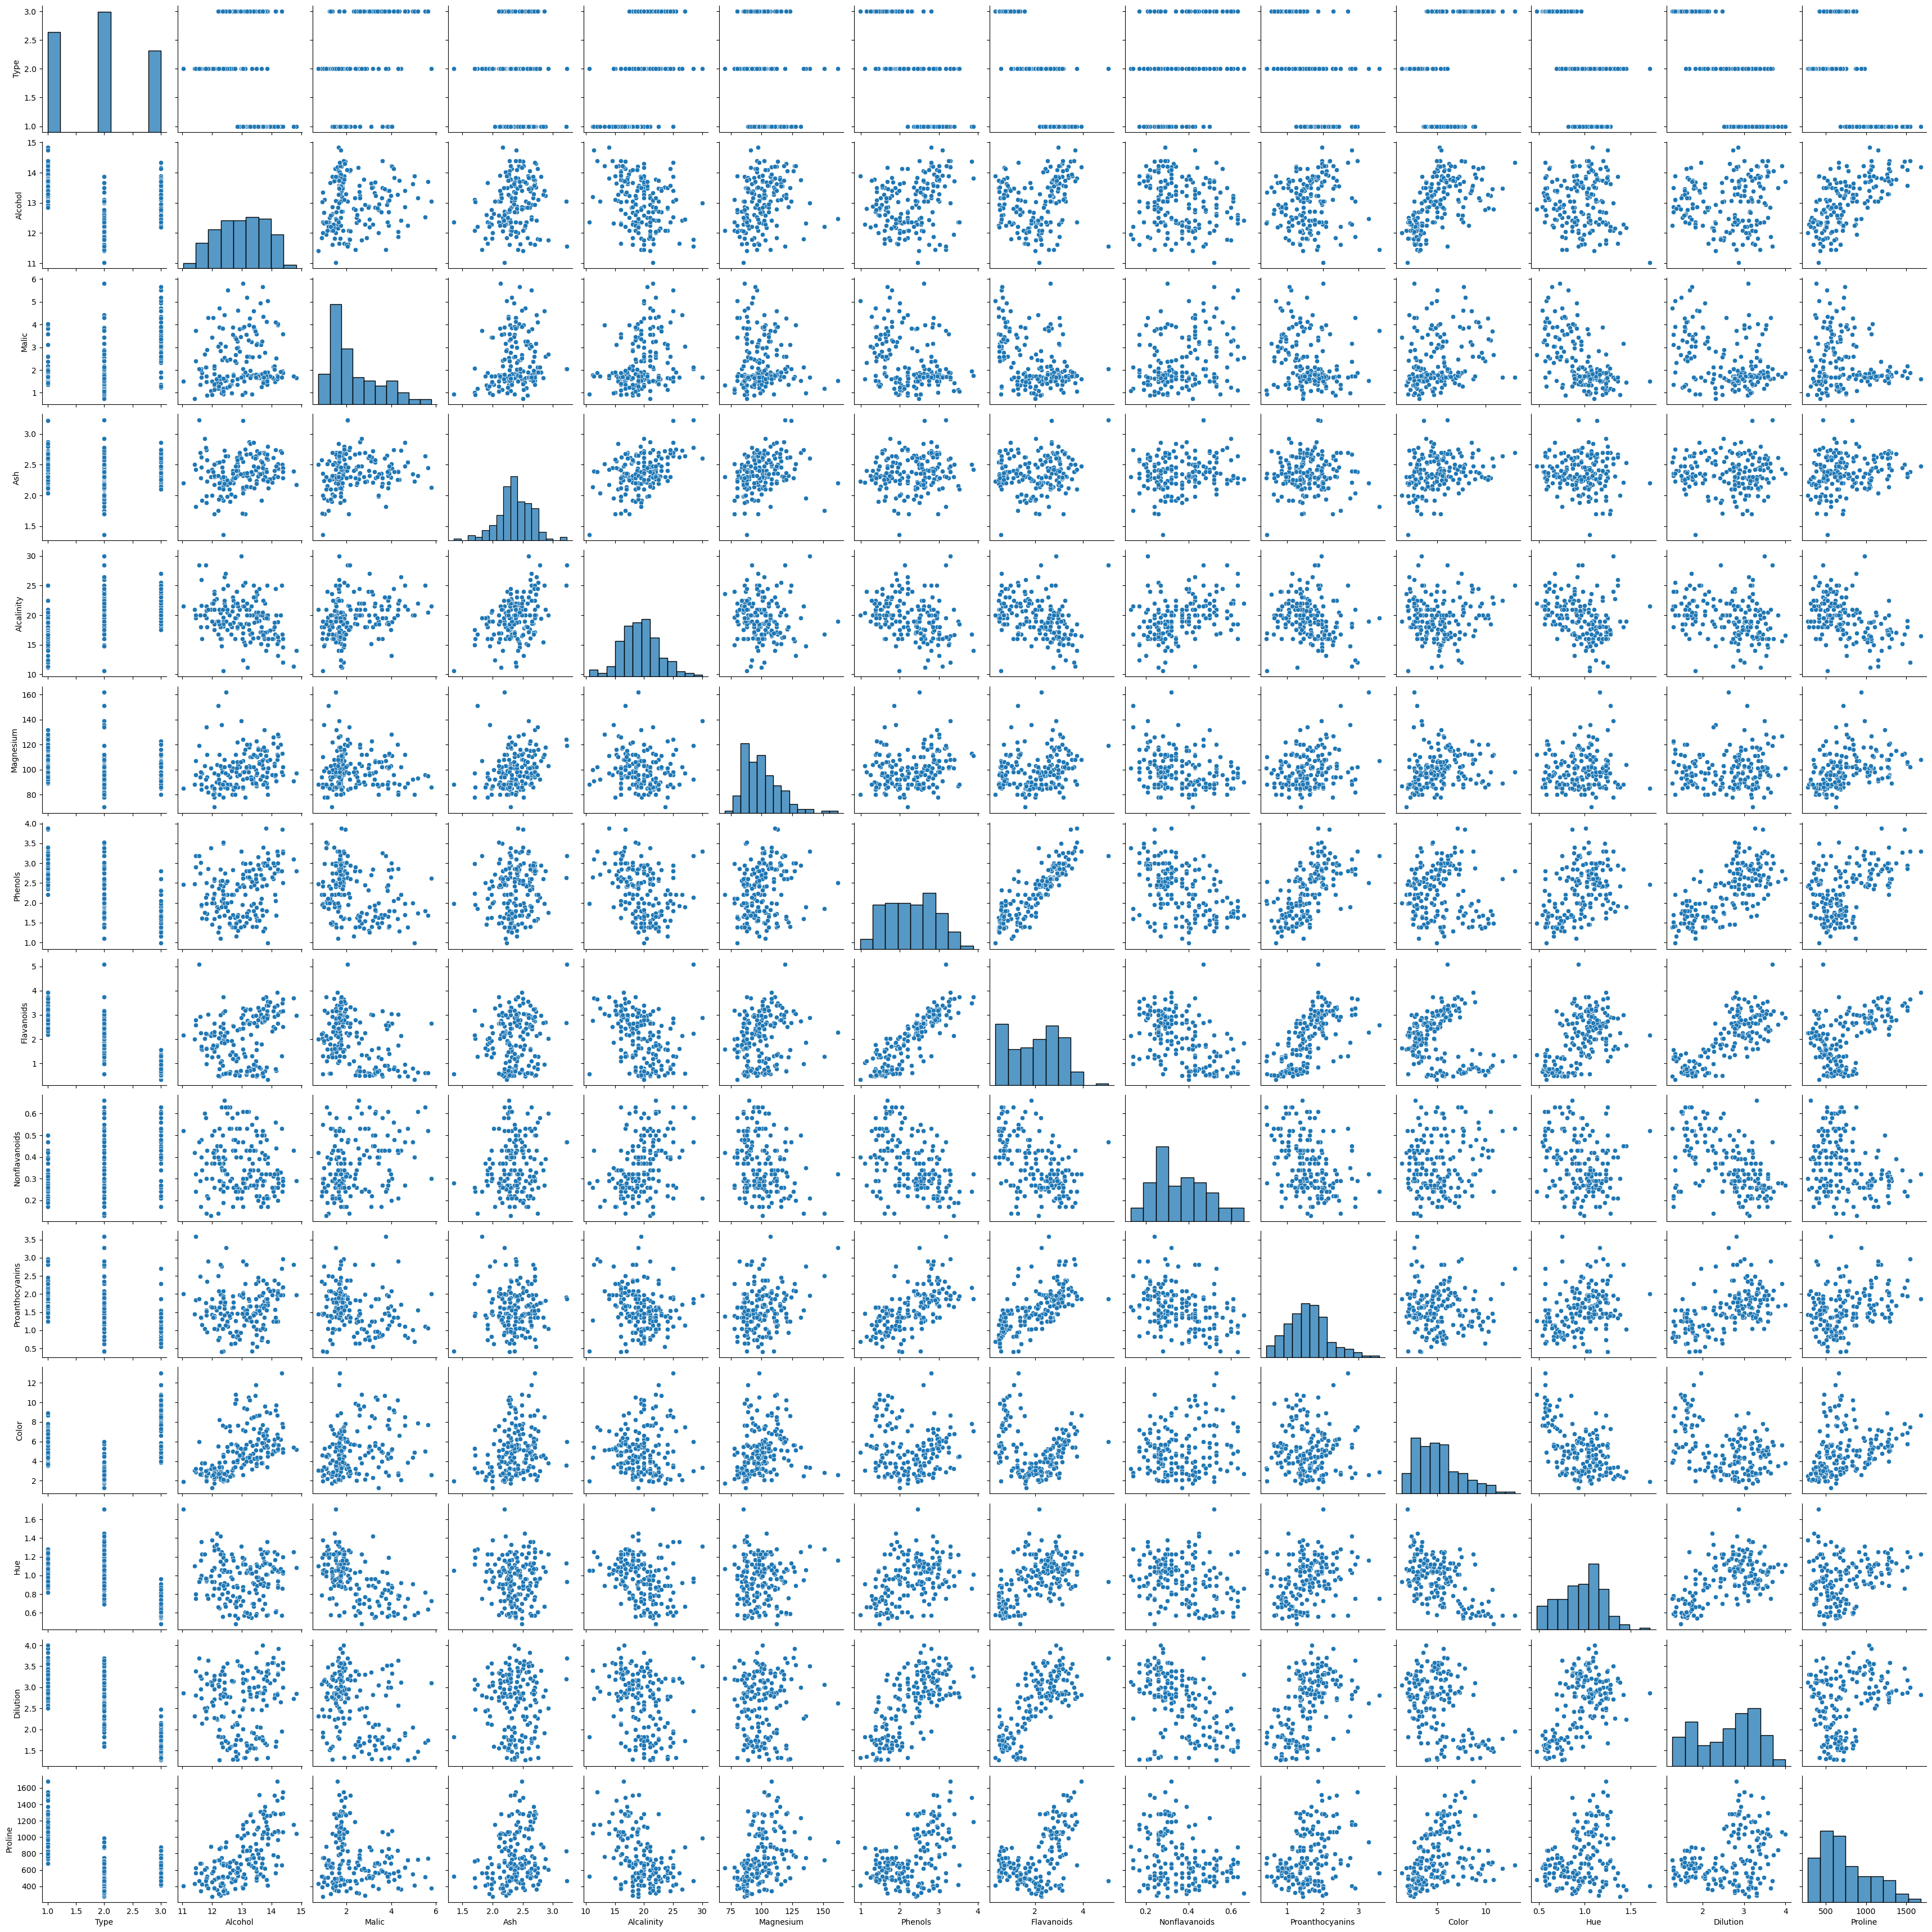

In [14]:
# making pairplot for better visualization
sns.pairplot(df)


<Figure size 1300x400 with 0 Axes>

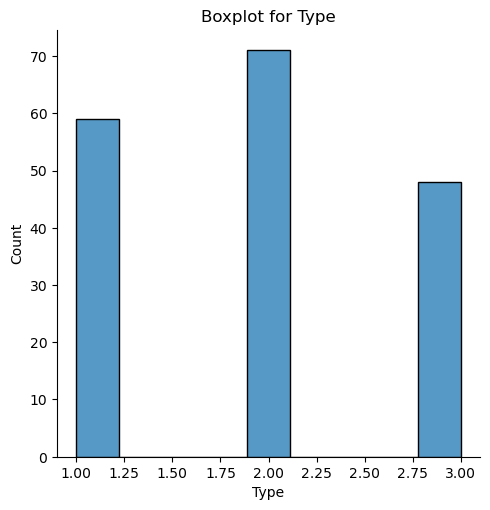

<Figure size 1300x400 with 0 Axes>

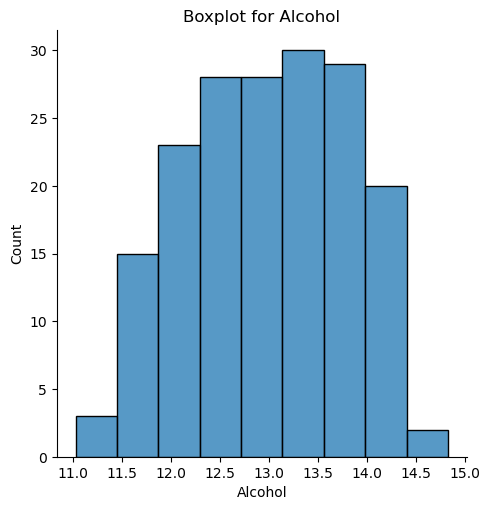

<Figure size 1300x400 with 0 Axes>

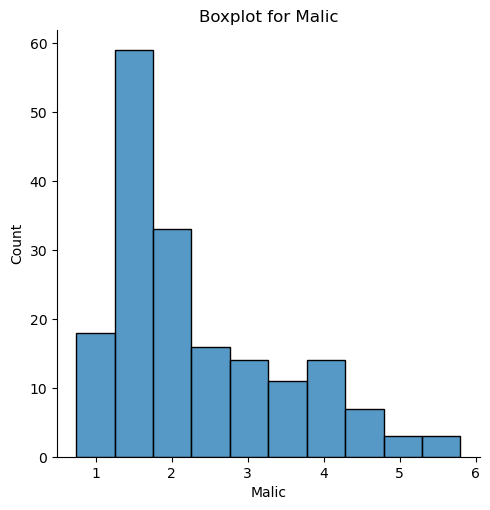

<Figure size 1300x400 with 0 Axes>

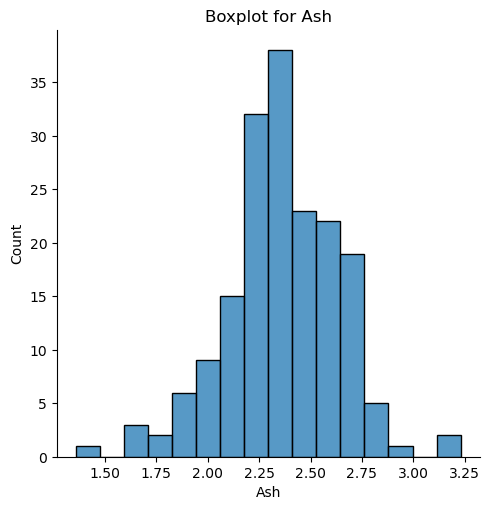

<Figure size 1300x400 with 0 Axes>

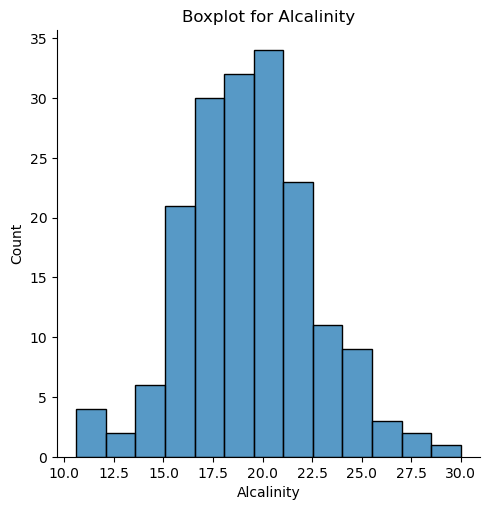

<Figure size 1300x400 with 0 Axes>

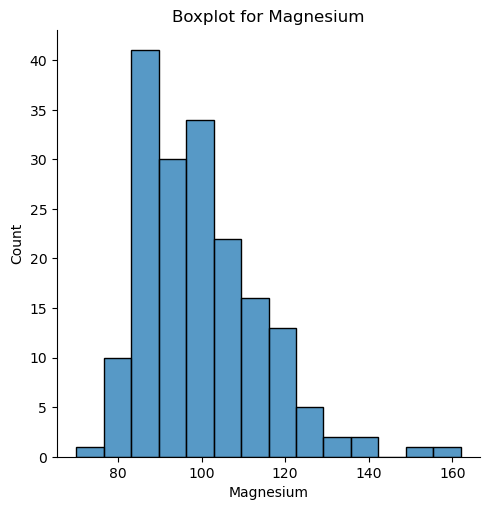

<Figure size 1300x400 with 0 Axes>

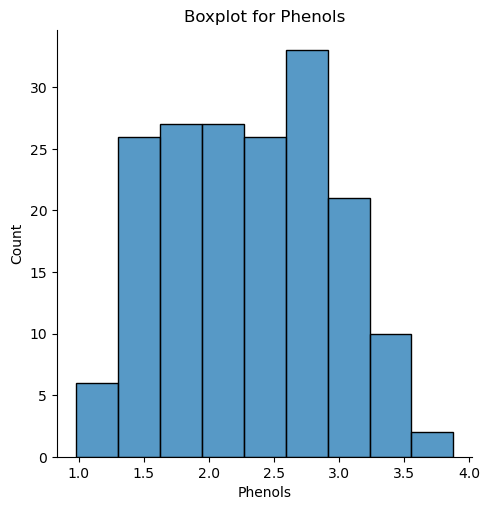

<Figure size 1300x400 with 0 Axes>

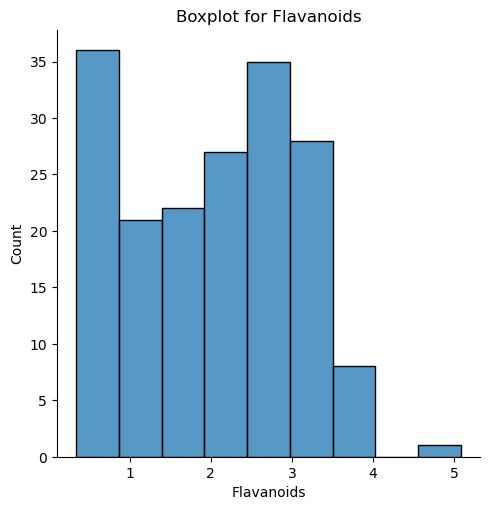

<Figure size 1300x400 with 0 Axes>

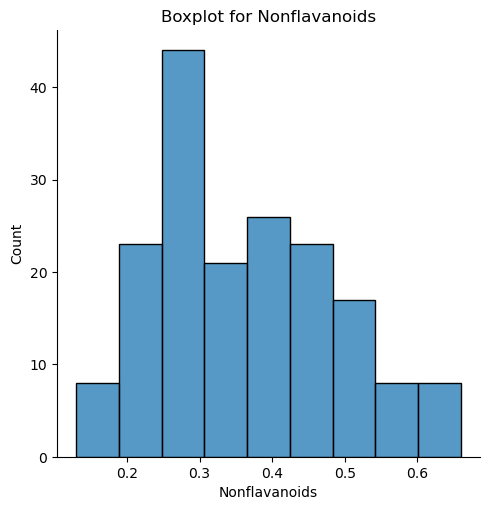

<Figure size 1300x400 with 0 Axes>

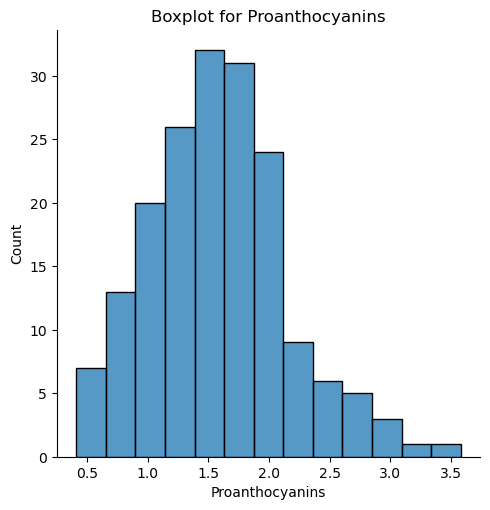

<Figure size 1300x400 with 0 Axes>

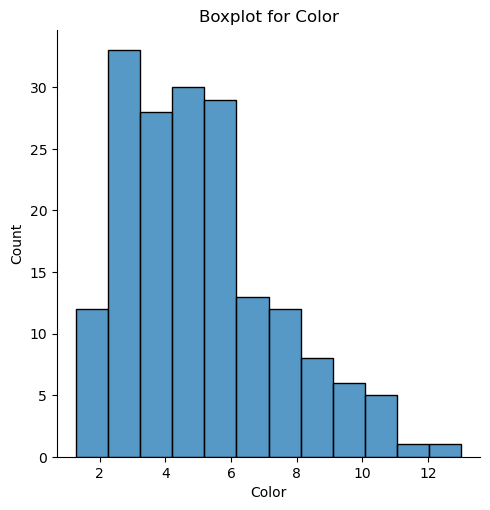

<Figure size 1300x400 with 0 Axes>

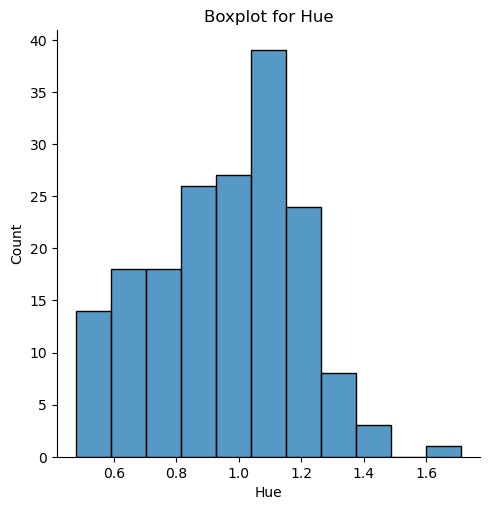

<Figure size 1300x400 with 0 Axes>

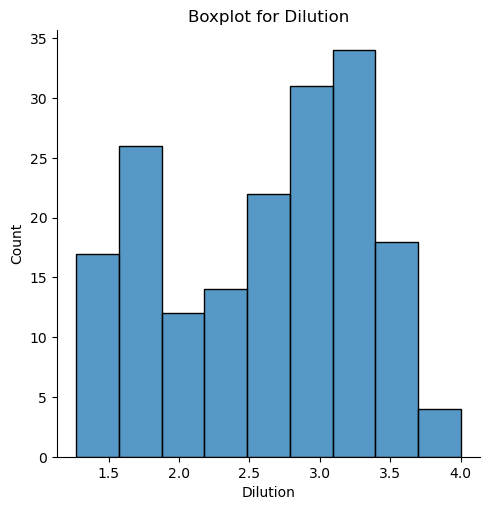

<Figure size 1300x400 with 0 Axes>

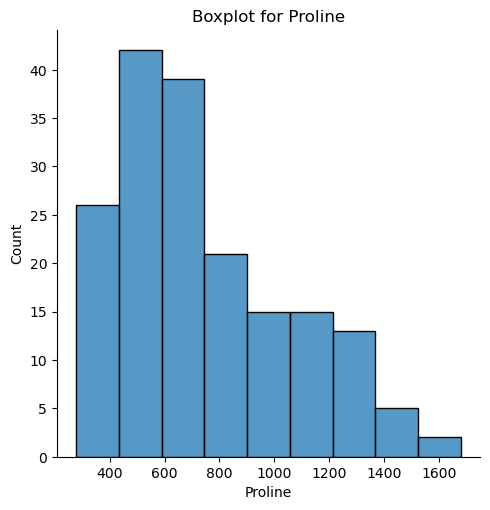

In [15]:
# density plot
for column in df.columns:
    plt.figure(figsize=(13, 4))
    sns.displot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

<Axes: >

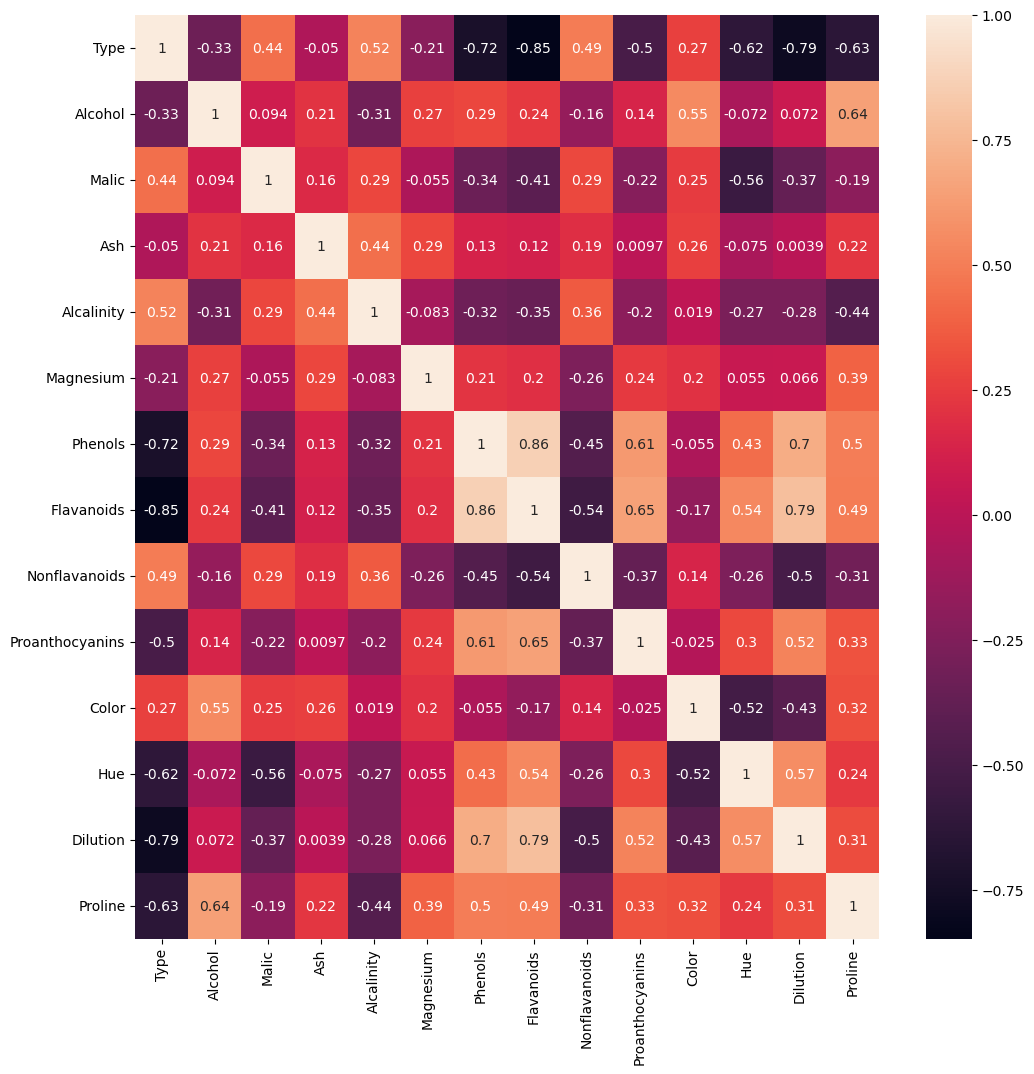

In [16]:
# Generating correlation heatmaps to explore relationships between pairs of variables

plt.figure(figsize=(12,12))
correlation=df.corr(numeric_only=True)
sns.heatmap(correlation,annot=True)

# Dimensionality Reduction with PCA

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [19]:
# Separate features and target (Type)
X = df.drop('Type', axis=1)
y = df['Type']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

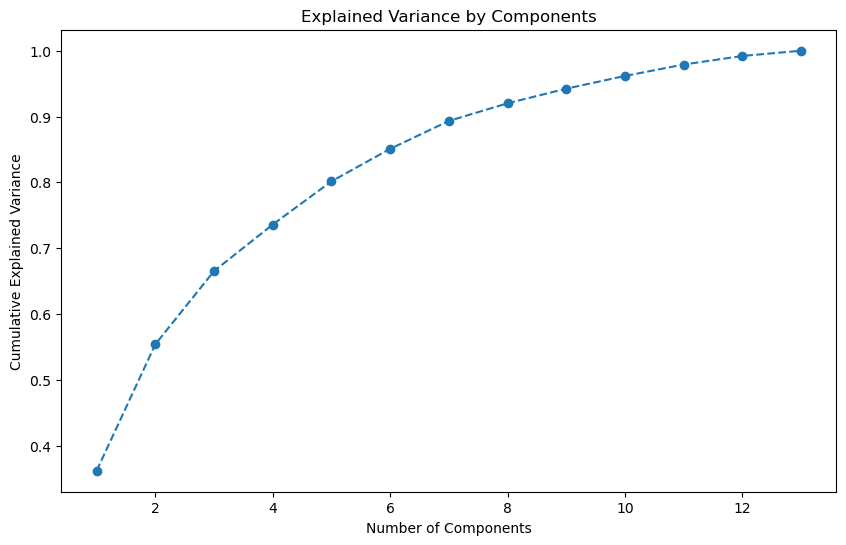

Optimal number of components: 10


In [20]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Determine the optimal number of components (e.g., 95% variance)
optimal_components = np.argmax(pca.explained_variance_ratio_.cumsum() >= 0.95) + 1
print(f'Optimal number of components: {optimal_components}')

In [21]:
# Apply PCA with optimal components
pca = PCA(n_components=optimal_components)
X_pca_transformed = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA-transformed data
pca_df = pd.DataFrame(data=X_pca_transformed, columns=[f'PC{i+1}' for i in range(optimal_components)])
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880  0.596427   
1  2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120  0.053776   
2  2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276  0.424205   
3  3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431 -0.383337   
4  1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520  0.444074   

        PC8       PC9      PC10  
0  0.065139  0.641443  1.020956  
1  1.024416 -0.308847  0.159701  
2 -0.344216 -1.177834  0.113361  
3  0.643593  0.052544  0.239413  
4  0.416700  0.326819 -0.078366  


# Clustering with Original Data

In [23]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataset
df['Cluster'] = clusters

C:\Users\lbt99\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


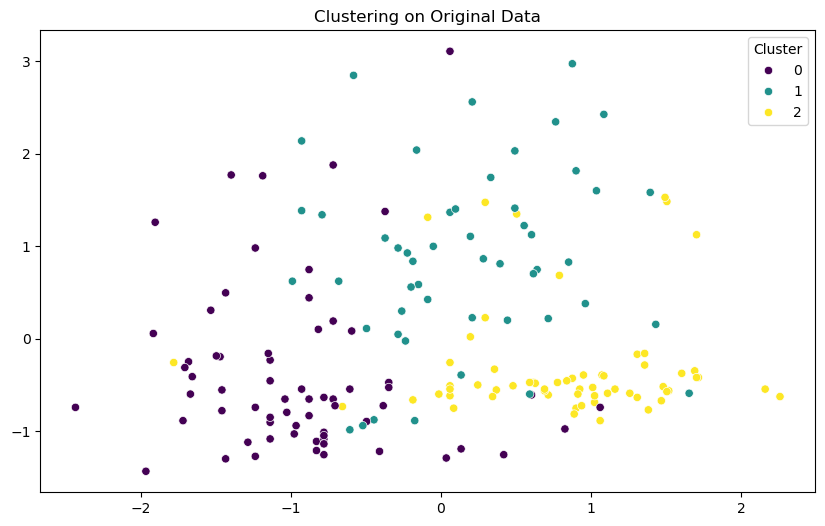

In [24]:
# Plot clusters using the first two features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Clustering on Original Data')
plt.show()

In [25]:
# Calculate silhouette score and Davies-Bouldin index
silhouette_orig = silhouette_score(X_scaled, clusters)
davies_bouldin_orig = davies_bouldin_score(X_scaled, clusters)

print(f'Silhouette Score (Original): {silhouette_orig}')
print(f'Davies-Bouldin Index (Original): {davies_bouldin_orig}')

Silhouette Score (Original): 0.2848589191898987
Davies-Bouldin Index (Original): 1.3891879777181648


# Clustering with PCA Data

In [27]:
# Apply K-means clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca_transformed)

# Add cluster labels to the PCA-transformed dataset
pca_df['Cluster'] = clusters_pca

C:\Users\lbt99\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


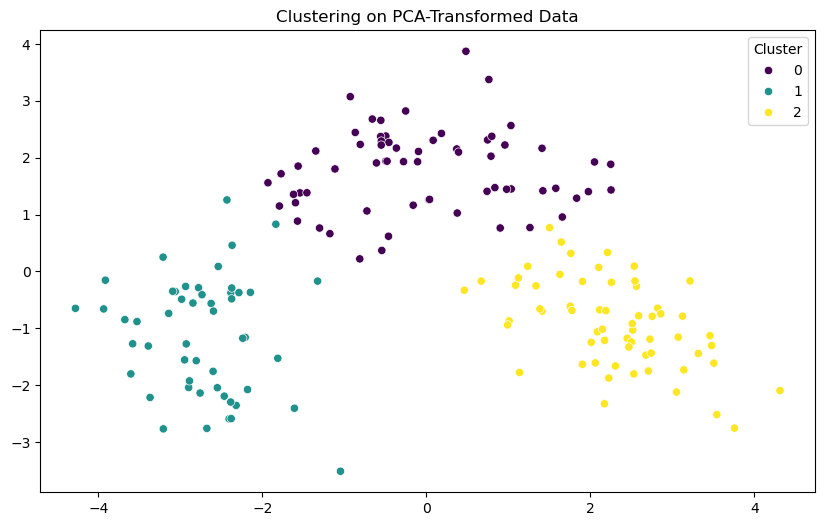

In [28]:
# Plot clusters using the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_transformed[:, 0], y=X_pca_transformed[:, 1], hue=pca_df['Cluster'], palette='viridis')
plt.title('Clustering on PCA-Transformed Data')
plt.show()

In [29]:
# Calculate silhouette score and Davies-Bouldin index for PCA-transformed data
silhouette_pca = silhouette_score(X_pca_transformed, clusters_pca)
davies_bouldin_pca = davies_bouldin_score(X_pca_transformed, clusters_pca)

print(f'Silhouette Score (PCA): {silhouette_pca}')
print(f'Davies-Bouldin Index (PCA): {davies_bouldin_pca}')

Silhouette Score (PCA): 0.29867482943692897
Davies-Bouldin Index (PCA): 1.3363263335155764


# Comparison and Analysis

In [31]:
# Compare clustering metrics
print(f'Silhouette Score (Original): {silhouette_orig}')
print(f'Silhouette Score (PCA): {silhouette_pca}')
print(f'Davies-Bouldin Index (Original): {davies_bouldin_orig}')
print(f'Davies-Bouldin Index (PCA): {davies_bouldin_pca}')
'''  
# similarities and differences.
Silhouette Score: Higher values indicate better-defined clusters.

Davies-Bouldin Index: Lower values indicate better clustering

# Reflect on the impact of dimensionality reduction

PCA reduces noise and redundancy, which can improve clustering performance.

However, it may also lose some interpretability of the original features

# Analyze trade-offs
Orginal Data Retains all information but may suffer from the curse of dimensionality

PCA Data Reduces dimensionality and noise but may lose some interpretability. '''

Silhouette Score (Original): 0.2848589191898987
Silhouette Score (PCA): 0.29867482943692897
Davies-Bouldin Index (Original): 1.3891879777181648
Davies-Bouldin Index (PCA): 1.3363263335155764


'  \n# similarities and differences.\nSilhouette Score: Higher values indicate better-defined clusters.\n\nDavies-Bouldin Index: Lower values indicate better clustering\n\n# Reflect on the impact of dimensionality reduction\n\nPCA reduces noise and redundancy, which can improve clustering performance.\n\nHowever, it may also lose some interpretability of the original features\n\n# Analyze trade-offs\nOrginal Data Retains all information but may suffer from the curse of dimensionality\n\nPCA Data Reduces dimensionality and noise but may lose some interpretability. '

# Conclusion and Insights

In [33]:
'''
# Findings:

PCA can improve clustering performance by reducing noise and redundancy.

The optimal number of principal components can be determined using explained variance.

# Practical Implications:

PCA is useful for high-dimensional datasets where clustering directly may be inefficient.

Clustering on original data is better when interpretability is crucial.

# Recommendations:

Use PCA when dealing with high-dimensional data or when computational efficiency is a concern.

Use original data clustering when interpretability and feature importance are critical.'''

'\n# Findings:\n\nPCA can improve clustering performance by reducing noise and redundancy.\n\nThe optimal number of principal components can be determined using explained variance.\n\n# Practical Implications:\n\nPCA is useful for high-dimensional datasets where clustering directly may be inefficient.\n\nClustering on original data is better when interpretability is crucial.\n\n# Recommendations:\n\nUse PCA when dealing with high-dimensional data or when computational efficiency is a concern.\n\nUse original data clustering when interpretability and feature importance are critical.'